# Infinite Variance

The estimates of ordinary importance sampling will typically have infinite variance, and thus unsatisfactory convergence properties, whenever the scaled returns have infinite variance — and this can easily happen in off-policy learning when trajectories contain loops.

In [1]:
from IPython.display import Image

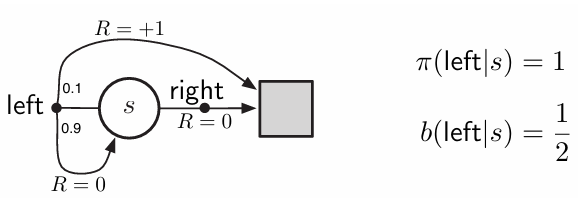

In [2]:
Image(filename="../book_images/Figure_5_4_1.PNG")

There is only 1 non-terminal state $s$ and 2 actions, $right$ and $left$.
- The right action causes a deterministic transition to termination.
- The left action transitions:
  - back to $s$ with probability 0.9,
  - on to termination with probability 0.1.

The rewards are +1 on the latter transition and otherwise 0.

Consider the target policy $\pi$ that always selects $left$, i.e. $\pi(left | s) = 1$
- All episodes under this policy consist of some number (possibly 0) of transitions back to $s$ followed by termination with a reward and return of +1.
- Thus, the value of $s$ under the target policy $\pi$ is 1 ($\gamma$ = 1).

Suppose we are estimating this value from off-policy data using the behavior policy $b$ that selects $right$ and $left$ with equal probability, i.e. $b(left | s) = 1/2 = b(right | s)$.


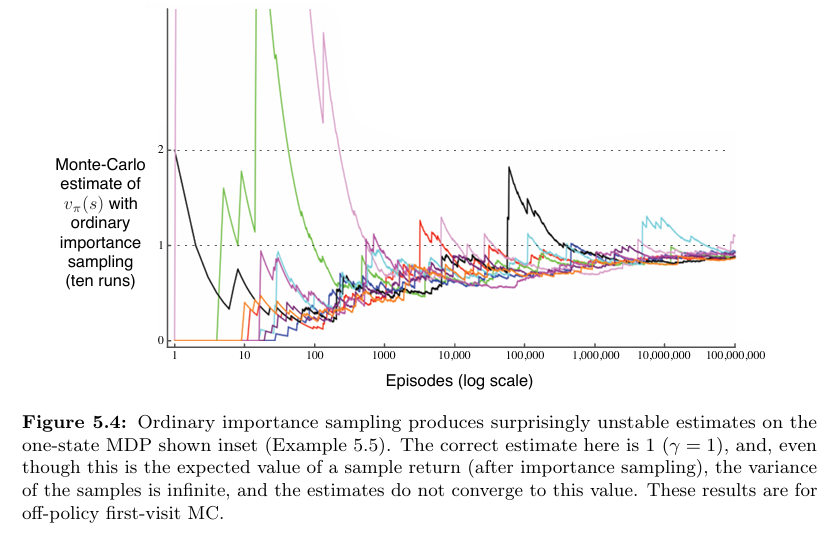

In [3]:
Image(filename="../book_images/Figure_5_4_2.PNG")

The lower part of Figure 5.4 shows 10 independent runs of the first-visit MC algorithm using ordinary importance sampling.
- Even after millions of episodes, the estimates fail to converge to the correct value of 1.
- In contrast, the weighted importance-sampling algorithm would give an estimate of exactly 1 forever after the 1st episode that ended
 with the left action.
- All returns not equal to 1 (that is, ending with the right action) would be inconsistent with the target policy and thus would have a $\rho_{t:T(t)-1}$ of 0 and contribute neither to the numerator nor denominator of (5.6).
- The weighted importance sampling algorithm produces a weighted average of only the returns consistent with the target policy $\pi$, and all of these would be exactly 1.

In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from src.infinite_variance import actions, play

matplotlib.use('Agg')

In [5]:
# Number of runs
runs = 10

# Number of episodes
episodes = 100000

In [6]:
# For every run
for run in range(runs):
    # create an empty list for weighted rewards
    weighted_rewards = []

    # for every episode
    for episode in range(episodes):
        # get reward and trajectory of actions
        reward, action_trajectory = play()

        # check if the last action is 'right'
        if action_trajectory[-1] == actions["right"]:
            importance_sampling_ratio = 0
        else:
            importance_sampling_ratio = 1.0 / pow(0.5, len(action_trajectory))

        # calculate the weighted reward and append it to the list of weighted rewards
        weighted_rewards.append(importance_sampling_ratio * reward)

    # calculate the accumulative sum of weighted rewards
    weighted_rewards = np.add.accumulate(weighted_rewards)

    # calculate the estimates according to the ordinary importance sampling (Equation (5.5))
    ordinary_estimates = np.asarray(weighted_rewards) / np.arange(1, episodes + 1)

    # plotting
    plt.plot(ordinary_estimates)

In [7]:
plt.xlabel('Episodes (log scale)')
plt.ylabel('Ordinary Importance Sampling')
plt.xscale('log')

In [8]:
plt.savefig('../generated_images/figure_5_4.png')
plt.close()